In [1]:
import pandas as pd
import re

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data/Labelled_Training_Data.csv', header=0)
print(df.head())

                                             comment  \
0  you can t be charged under 377a if you are not...   
1  in fact , they have captured the courts to the...   
2  see the whole premise of those supporting the ...   
3  if you argue that it s because of post 19th ce...   
4  also , every country that has legalized same s...   

                                    original_content           create_utc  \
0  you can t be charged under 377a if you are not...  2017-03-28 10:57:09   
1   i have not read up on the situation in the we...  2022-08-21 10:31:30   
2  see the whole premise of those supporting the ...  2022-07-23 08:59:28   
3  i feel like the arguement has kinda become con...  2021-02-22 21:22:38   
4   i support the government s prudent and though...  2019-06-30 11:09:35   

  community        aspect_term  Sentiment  
0    Reddit               377a          0  
1    Reddit              trans         -1  
2    Reddit             rights         -1  
3    Reddit      homosex

In [3]:
df['aspect_term'].value_counts()

aspect_term
377a                  1209
rights                 842
trans                  505
homosexuality          442
same sex               369
homosexual             294
same sex marriage      278
sexual orientation     201
gay marriage           181
housing                153
gender dysphoria       100
adoption                56
gender identity         55
mental health           53
suicide                 52
les                     33
homo                    30
mental illness          26
diseases                26
non binary              22
ah gua                  19
depression              15
sex reassignment        11
pride parades           10
tranny                   8
anti gay law             4
ladyboy                  4
syphilis                 1
sapphic                  1
Name: count, dtype: int64

In [4]:
def adjust_comment(comment, aspect_term):
    # Split the comment into words
    words = comment.split()
    # Split the aspect term into words
    aspect_words = aspect_term.split()
    # Find the index of the first word of the aspect term
    aspect_index = -1
    for i in range(len(words)):
        if words[i:i+len(aspect_words)] == aspect_words:
            aspect_index = i
            break
    # If aspect term not found, return original comment
    if aspect_index == -1:
        return comment
    # Calculate the number of words to include before and after the aspect term
    words_before = min(20, aspect_index)
    words_after = min(20, len(words) - aspect_index - len(aspect_words))
    # Adjust the comment to include 40 words
    adjusted_comment = ' '.join(words[aspect_index - words_before : aspect_index + len(aspect_words) + words_after])
    return adjusted_comment

# Apply the function to the dataframe
# df['comment'] = df.apply(lambda row: adjust_comment(row['comment'], row['aspect_term']), axis=1)

In [5]:
import numpy as np
#df = df.sample(frac=1, random_state=42)
np.random.seed(12)
# Save the modified DataFrame back to a CSV file
df = df.sample(frac=1)
df.to_csv('data/Labelled_Training_Data_Preprocessed.csv', index=False)

In [6]:
df.shape

(5000, 6)

In [7]:
df.head()

,comment,original_content,create_utc,community,aspect_term,Sentiment
4506,heterosexual upbringing does not guarantee het...,chuakboon said not normal lo . even they adopt...,22-08-2022,Hardware Zone,homosexual,0
1273,the railroading of same sex marriage on the am...,it is not marriage calling something marriage...,2015-06-11 10:18:21,Reddit,homosexuality,0
357,people have tried treating gender dysphoria by...,there are multiple reasons . there used to be ...,2021-03-08 18:33:04,Reddit,gender dysphoria,1
478,constitution means nothing here because pap ca...,racking2322 said tats ok . but if they start g...,2022-08-21,Hardware Zone,same sex marriage,1
356,let s work towards getting rid of the perverte...,"how about , male female marry . and one of the...",2022-01-04,Hardware Zone,homosexuality,-1


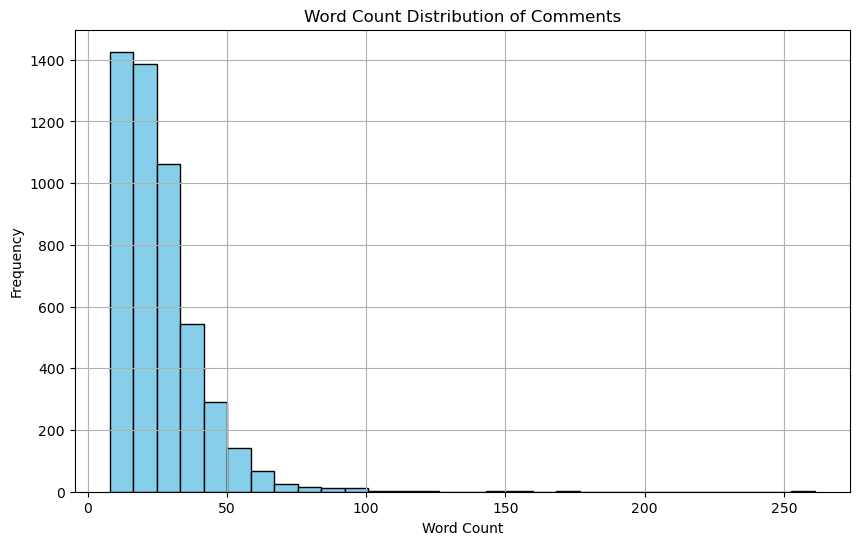

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt


# Tokenize the sentences in the 'comment' column
word_counts = df['comment'].apply(lambda x: len(x.split()))

# Plot the word count distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution of Comments')
plt.grid(True)
plt.show()
